<a href="https://colab.research.google.com/github/pnabende/intelligent-systems-course-unit/blob/main/simple_fuzzy_expert_system_for_estimating_tip_based_on_quality_and_service.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installations**

Install the skfuzzy library

In [1]:
!pip install scikit-fuzzy

**Imports**

Import some necessary packages

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

**Create Universe of discourse**

Create universe of discourse for different linguistic variables

In [3]:
quality = ctrl.Antecedent(np.arange(0,11,1), 'quality')
service = ctrl.Antecedent(np.arange(0,11,1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip', defuzzify_method='centroid')

**Membership functions**

Membership functions for food quality

In [4]:
quality['poor'] = fuzz.trimf(quality.universe, [0, 0, 5])
quality['average'] = fuzz.trimf(quality.universe, [0, 5, 10])
quality['good'] = fuzz.trimf(quality.universe, [5, 10, 10])

Membership functions for service

In [5]:
service['poor'] = fuzz.trimf(service.universe, [0, 0, 5])
service['average'] = fuzz.trimf(service.universe, [0, 5, 10])
service['good'] = fuzz.trimf(service.universe, [5, 10, 10])

Sugeno style output membership functions

In [6]:
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

**Define rules using Sugeno inference**

In [7]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

**Add rules**
Add rules to a control system

In [8]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

**Create a ControlSystemSimulation object**

In [9]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

**Usage**

provide crisp inputs

In [10]:
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

Perform Sugeno inference

In [11]:
tipping.compute()

Output

In [12]:
print(tipping.output['tip'])

19.847607361963192


You can visualize the results

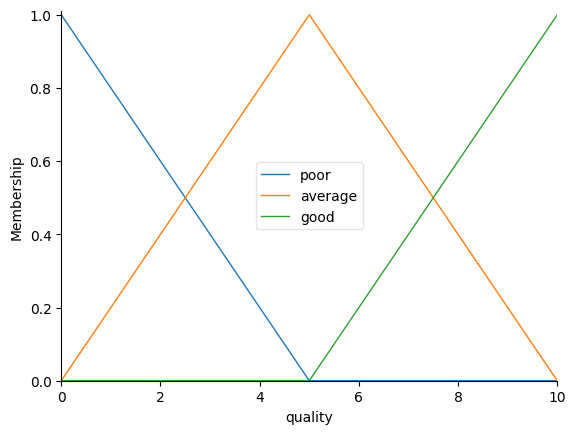

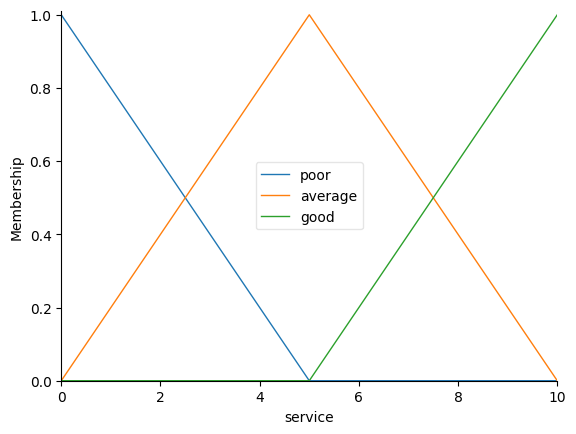

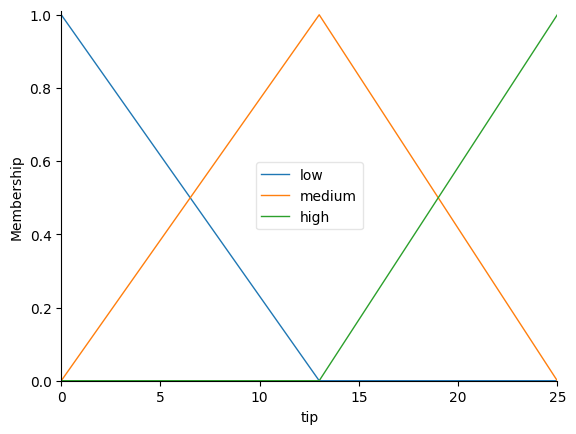

In [13]:
quality.view()
service.view()
tip.view()